<a href="https://colab.research.google.com/github/TanyaKHughes/UCSDBootcamp/blob/main/Fetal_Health_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This workbook explores and fits the [Fetal Health Classification data](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification).

##Import packages and data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

%cd 'drive/MyDrive/UCSD bootcamp/Capstone/Fetal Health'
!pwd

/content/drive/MyDrive/UCSD bootcamp/Capstone/Fetal Health
/content/drive/MyDrive/UCSD bootcamp/Capstone/Fetal Health


In [16]:
df = pd.read_csv('fetal_health.csv')

##Explore the data

###Exploration basics

In [17]:
print(df.shape)
df.head()

(2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


$\color{green}{\text{So we have 21 features, 1 outcome colume ('fetal_health').  Also, all the columns are floats.}}$

In [18]:
df.isna().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


$\color{green}{\text{No missing values!}}$

In [19]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


$\color{green}{\text{I don't notice anything unusual here (above).}}$

$\color{green}{\text{Below, I'm looking for values that are negative but shouldn't be. There aren't any.}}$

In [20]:
# df[df<0] returns a dataframe the same size & shape as the original but only
# includes those values that are <0; the rest are converted to NaN
df[df<0].sum()

,0
baseline value,0.0
accelerations,0.0
fetal_movement,0.0
uterine_contractions,0.0
light_decelerations,0.0
severe_decelerations,0.0
prolongued_decelerations,0.0
abnormal_short_term_variability,0.0
mean_value_of_short_term_variability,0.0
percentage_of_time_with_abnormal_long_term_variability,0.0


###Make some boxplots to look at outliers

$\color{green}{\text{First, write a utility function to shorten the widths of the plot titles so they don't write on top of each other: (does this already exist somewhere in python?)}}$

In [24]:
def breakup_title(title, width = 15):
  '''Takes a string "title" and inserts a newline every 15 characters.'''

  leftover = title
  new_title = ''

  while len(leftover) > width:
    new_title += leftover[:width] + '\n'
    leftover = leftover[width:]

  new_title += leftover
  return new_title

print(breakup_title('You are my sunshine my only sunshine you make me happy when ' +
                'skies are grey', 30))

You are my sunshine my only su
nshine you make me happy when 
skies are grey


$\color{green}{\text{It works!}}$

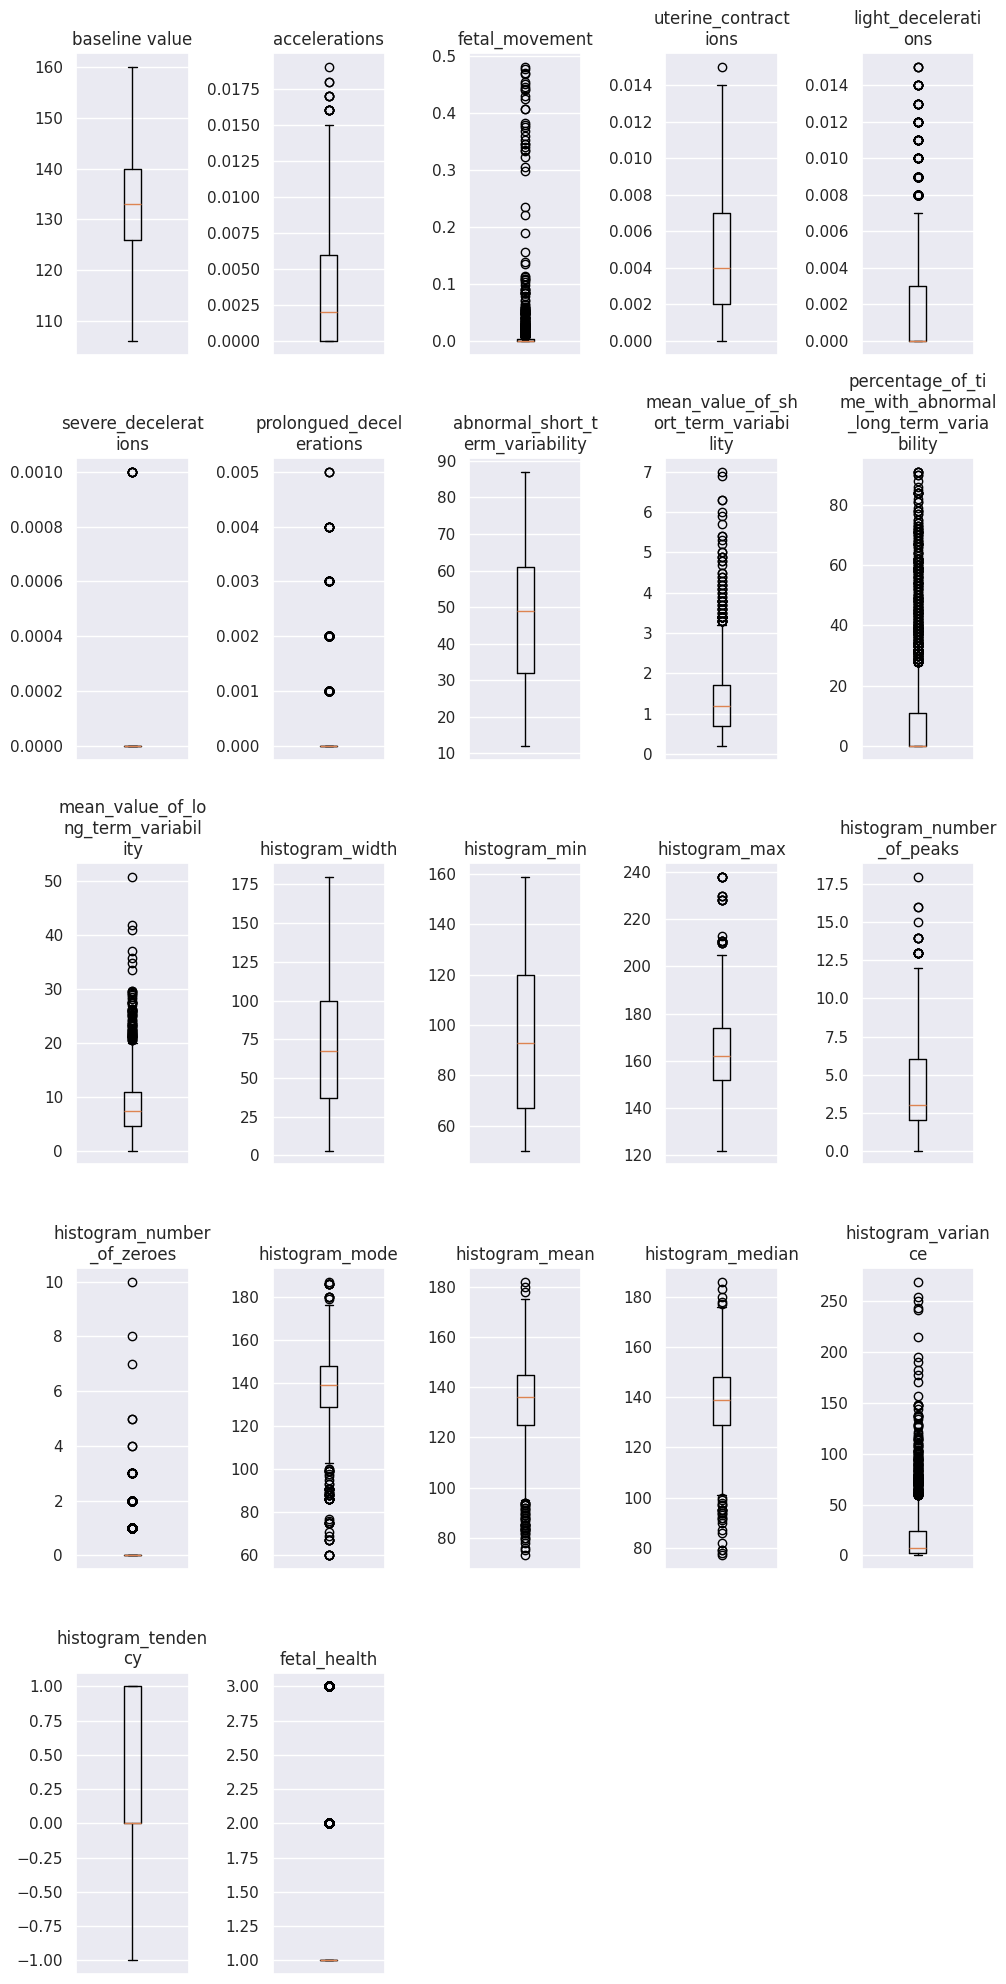

In [35]:
# Let's do some boxplots to look for outliers
cols =  df.columns.to_list()
plot_rows = 5
plot_cols = 5
fig, ax = plt.subplots(nrows=plot_rows, ncols=plot_cols,figsize=(10,20))

for i in range(plot_rows):
  for j in range(plot_cols):
      if i*plot_rows+j < len(cols):
        ax[i,j].boxplot(df[cols[i*plot_cols+j]])
        ax[i,j].set_title(breakup_title(cols[i*plot_cols+j], 16))
        ax[i,j].set_ylabel('')
        ax[i,j].set_xticks([])
      else:
        ax[i,j].set_axis_off()
plt.tight_layout()
plt.show()

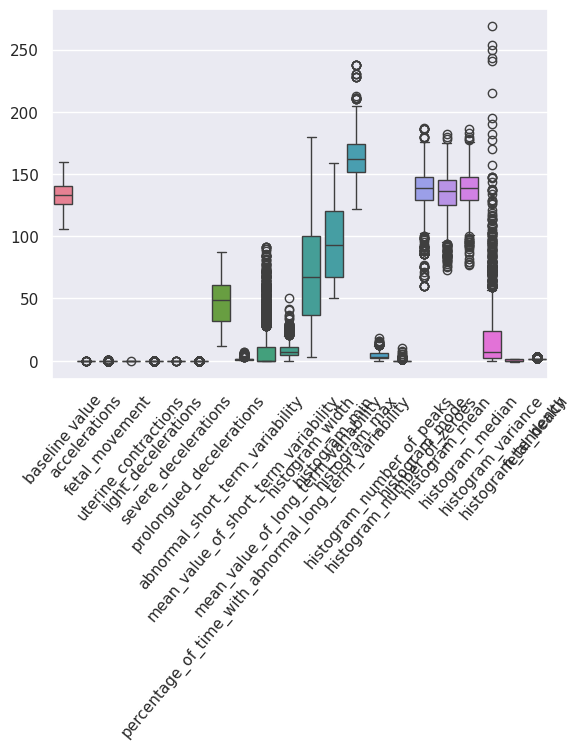

In [36]:
# We can also print all boxplots at once but then the y values are all combined
# so some of the features aren't really visible
# Seaborn gives colors however!
sns.set()
sns.boxplot(df)
#plt.axes
#plt.title(cols[i])
plt.ylabel('')
plt.xticks(rotation=50)
plt.show()

###Look at the outcome variable "fetal_health"

In [37]:
# First look at the outcome: Fetal health.  The median is at 1.  How many are
# there of each value?
df['fetal_health'].value_counts()

,count
fetal_health,
1.0,1655
2.0,295
3.0,176


$\color{green}{\text{Do I need to restrict the data so I only have 176 of each health category?}}$


###Looking at a few features

In [38]:
# Severe decelerations:
df['severe_decelerations'].value_counts()

,count
severe_decelerations,
0.000,2119
0.001,7


In [39]:
# Prolonged decelerations:
df['prolongued_decelerations'].value_counts()

,count
prolongued_decelerations,
0.000,1948
0.002,72
0.001,70
0.003,24
0.004,9
0.005,3


$\color{green}{\text{I'm not learning much here.}}$


###Look at correlations

$\color{green}{\text{I'm dropping all the columns having to do with the 'histogram'.}}$  $\color{green}{\text{I don't know what that is (the scientific article that would explain it is behind a paywall)}}$
$\color{green}{\text{and I suspect it is data derived from the other features.}}$

In [40]:
# Correlations
# Only use features 1-11
df.drop(columns = cols[11:21], inplace=True)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1.0


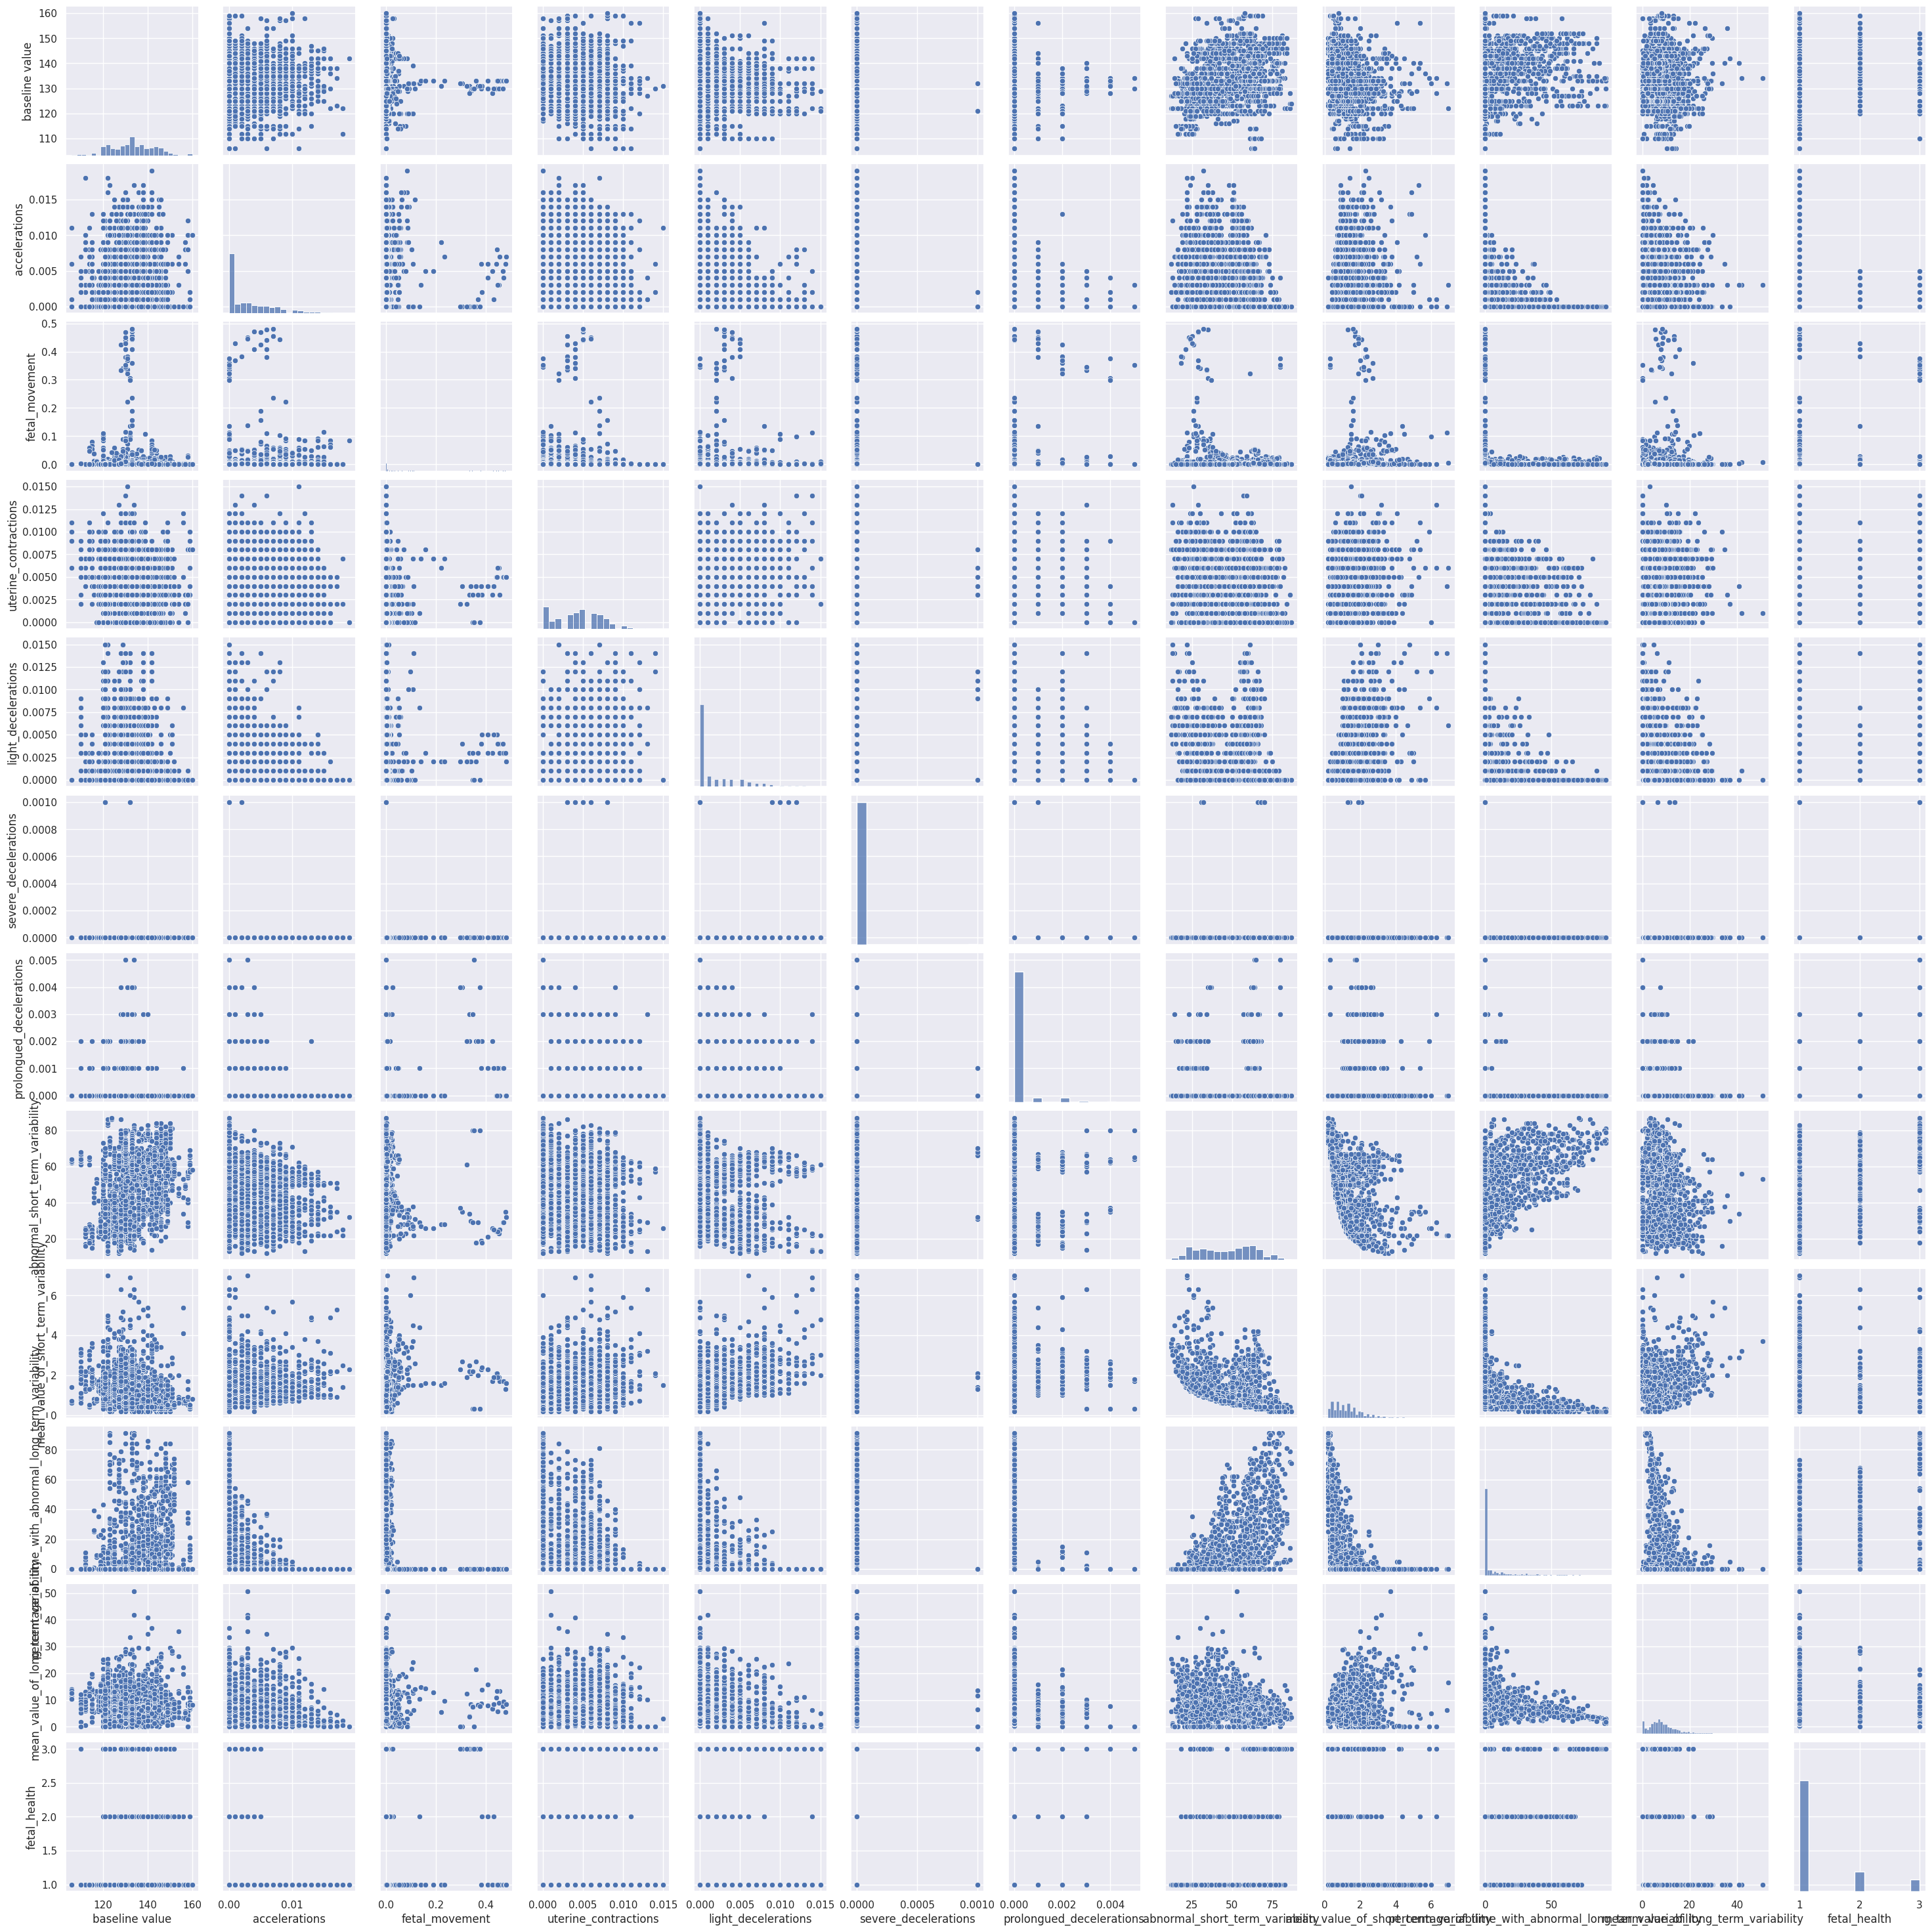

In [41]:
sns.set() # let's not redo this everytime I run the notebook
sns.pairplot(df)
plt.show()

$\color{green}{\text{So I find this quite odd.  I see no correlations here, especially not with the 'fetal_health' column.}}$


##Run a logistic regression

###Split and scale the data

In [22]:
# Let me try running a mutivariate logistic regression.
feature_names = df.columns.to_list()
feature_names.remove('fetal_health')
X_train, X_test, y_train, y_test = train_test_split(df[feature_names],
                                                    df['fetal_health'],
                                                    random_state = 0)
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)  # calculate the mean and variance of the training data

# Apply transform to both the training set and the test set ie scale them.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

###Run the regression

In [23]:
clf = LogisticRegression(solver='liblinear', # ?? why this one? - makes ovr the
                         random_state = 0)                            # default
                         # multi_class='ovr', # ovr = one vs rest - deprecated

clf.fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 0.8845671267252195
Test accuracy: 0.8778195488721805


$\color{green}{\text{I'd like some help knowing what to conclude.}}$